In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv("/Users/alexcurry/Downloads/DS_tut_data/DATA/hearing_test.csv")
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [60]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [61]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

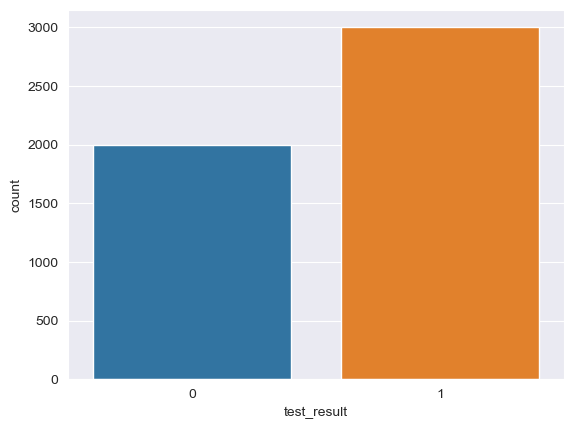

In [62]:
sns.countplot(data=df, x='test_result')

<Axes: xlabel='test_result', ylabel='physical_score'>

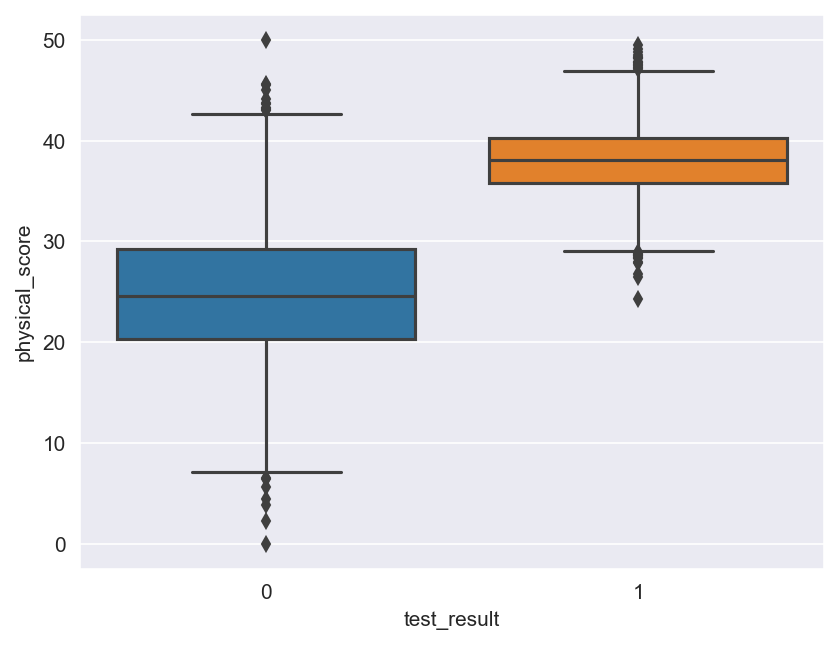

In [63]:
plt.figure(dpi=150)
sns.boxplot(x= 'test_result', y= 'physical_score', data=df)

<Axes: xlabel='age', ylabel='physical_score'>

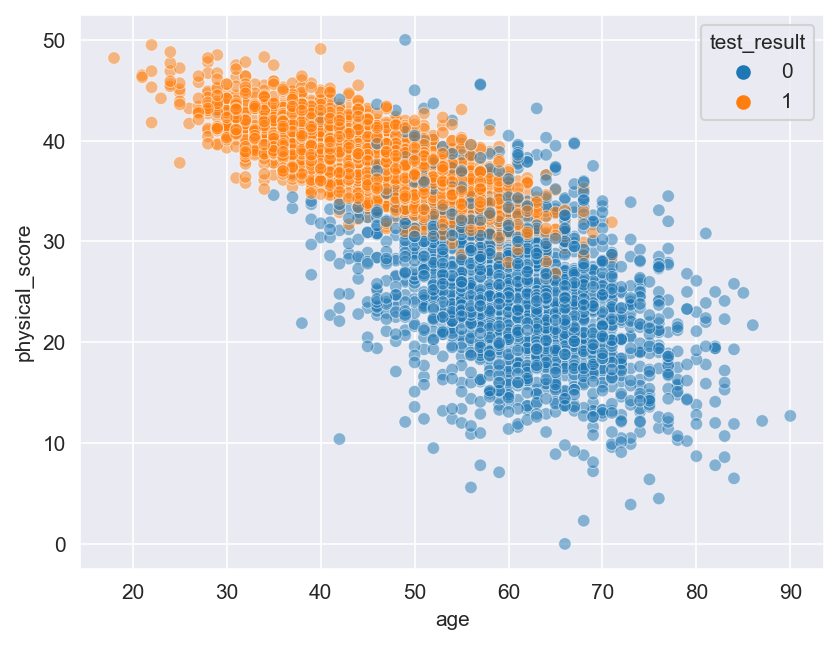

In [64]:
plt.figure(dpi=150)
sns.scatterplot(x= 'age', y= 'physical_score', data=df, hue='test_result',alpha=0.5 )

/Users/alexcurry/anaconda3/envs/Test/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


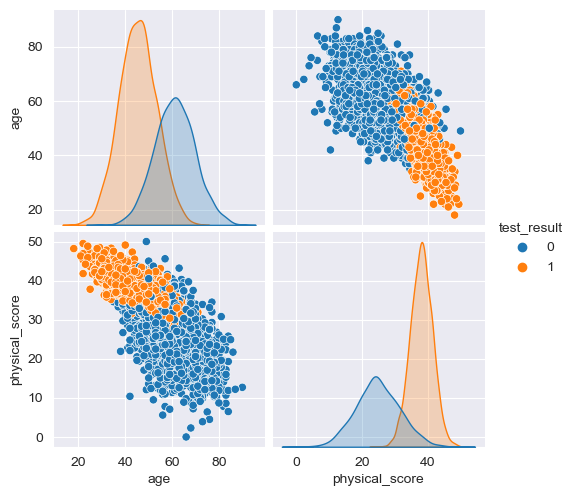

In [65]:
sns.pairplot(df,hue='test_result')

<Axes: >

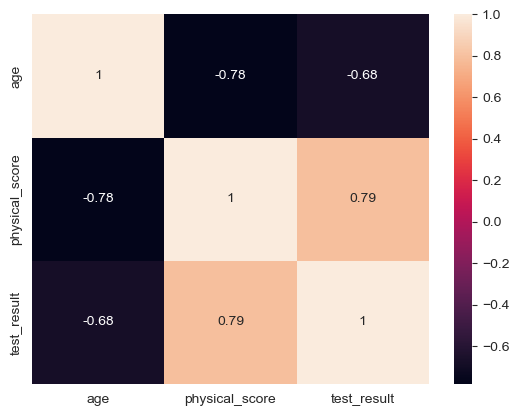

In [66]:
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='physical_score', ylabel='test_result'>

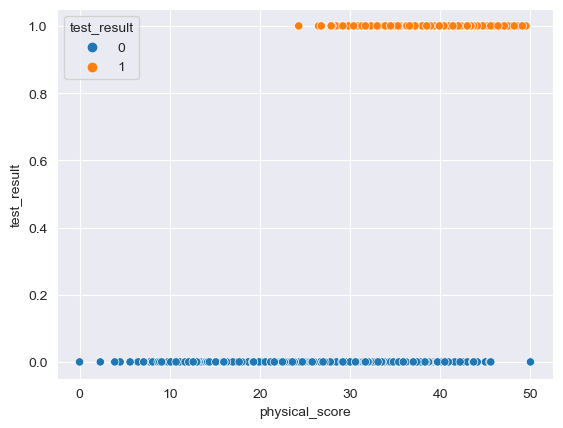

In [67]:
sns.scatterplot(x= 'physical_score', y= 'test_result', data=df, hue='test_result')

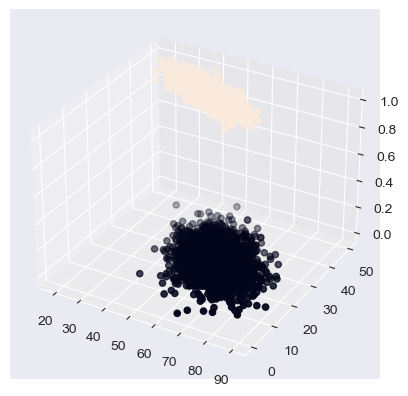

In [68]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'], df['physical_score'],df['test_result'], c=df['test_result'])

In [69]:
X = df.drop('test_result', axis=1)

In [70]:
y = df['test_result']

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=101)

In [73]:
scaler = StandardScaler()

In [74]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
log_model = LogisticRegression()

In [77]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [78]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [79]:
y_pred = log_model.predict(scaled_X_test)

In [80]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [81]:
accuracy = accuracy_score(y_test, y_pred)

In [82]:
confusion_matrix(y_test, y_pred)

array([[172,  21],
       [ 14, 293]])

In [83]:
from sklearn.metrics import ConfusionMatrixDisplay

In [84]:
cm = confusion_matrix(y_test, y_pred, labels=log_model.classes_, normalize='true')

In [85]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)

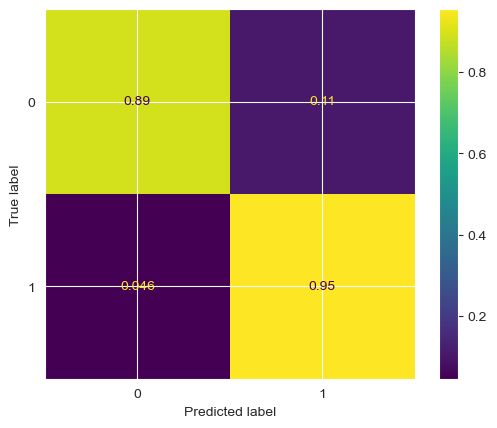

In [86]:
disp.plot()
plt.show()

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500


In [88]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [89]:
precision_score(y_test, y_pred)

0.9331210191082803

In [90]:
recall_score(y_test, y_pred)

0.9543973941368078

In [91]:
from sklearn.metrics import PrecisionRecallDisplay

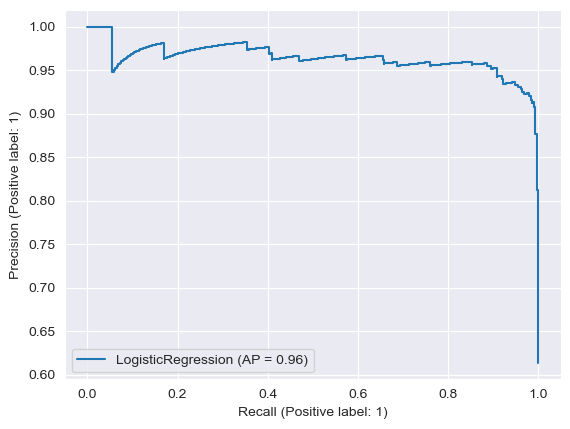

In [92]:
PrecisionRecallDisplay.from_estimator(estimator=log_model, X=scaled_X_test, y=y_test)

In [93]:
df = pd.read_csv("/Users/alexcurry/Downloads/DS_tut_data/DATA/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [95]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='species', ylabel='count'>

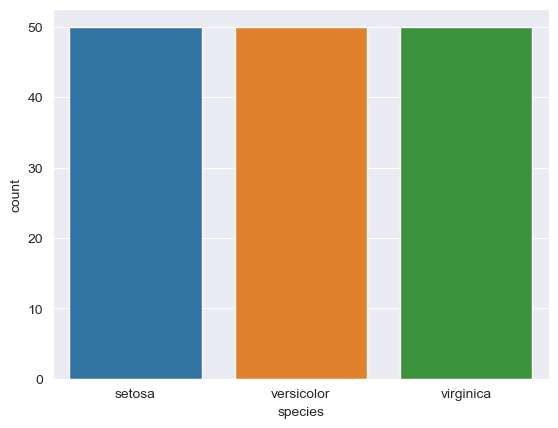

In [96]:
sns.countplot(x="species", data=df)

<Axes: xlabel='petal_length', ylabel='petal_width'>

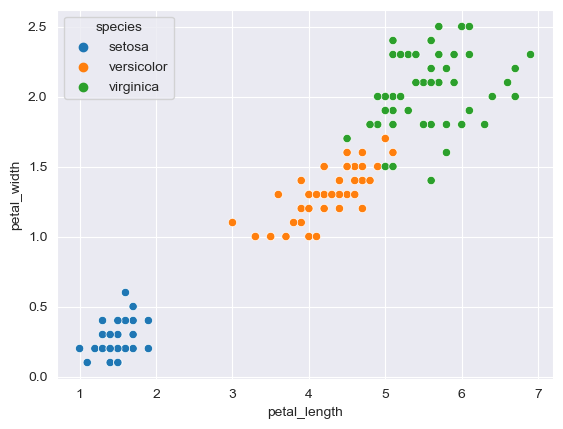

In [97]:
sns.scatterplot(x="petal_length", y="petal_width", data=df, hue="species")

/Users/alexcurry/anaconda3/envs/Test/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


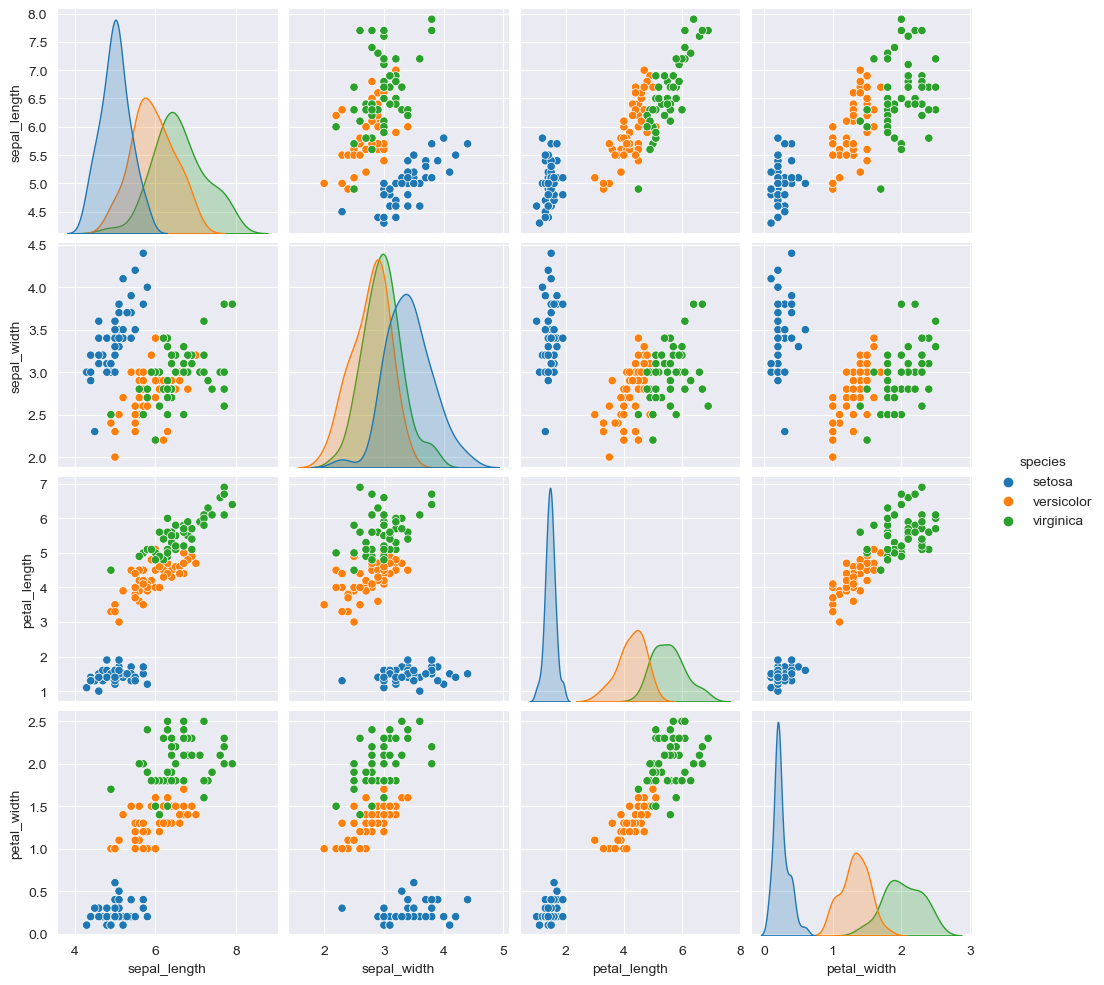

In [98]:
sns.pairplot(df, hue="species")

In [99]:
X = df.drop('species', axis=1)

In [100]:
y = df['species']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=101)

In [102]:
scaler = StandardScaler()

In [103]:
scaled_X_train = scaler.fit_transform(X_train)

In [104]:
scaled_X_test = scaler.transform(X_test)

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
from sklearn.model_selection import GridSearchCV

In [107]:
log_model = LogisticRegression(solver = 'saga', multi_class='ovr', max_iter=5000)

In [108]:
penalty = ['l1', 'l2', 'elasticnet']
l1_ratio = np.linspace(0,1,20)
C = np.logspace(0,10,20)

param_grid = {'penalty':penalty, 'l1_ratio':l1_ratio, 'C':C}


In [109]:
grid_model = GridSearchCV(log_model, param_grid=param_grid)

In [111]:
grid_model.fit(scaled_X_train,y_train)

/Users/alexcurry/anaconda3/envs/Test/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/alexcurry/anaconda3/envs/Test/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/alexcurry/anaconda3/envs/Test/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/alexcurry/anaconda3/envs/Test/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/alexcurry/anaconda3/envs/Test/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1171: UserWarning: l1_ratio parameter is only

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [112]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [113]:
grid_model.best_params_

{'C': 11.28837891684689, 'l1_ratio': 0.0, 'penalty': 'l1'}

In [114]:
y_pred = grid_model.predict(scaled_X_test)

In [115]:
accuracy_score(y_test,y_pred)

0.9736842105263158

In [118]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 10]])

In [121]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38
